# Modelos de Regresión Logística para Pedigrí Forense.

Modelos de regresión logística para resolver el problema de clasificación de registros en pedigrí forense, haciendo una comparativa entre modelos con parámetros por defecto y una búsqueda de los mejores parámetros mediante Grid Search en datos balanceados con relación de paternidad 

---

## Configuración de la sección

En esta sección se realiza lo siguiente:
- Importado de las librerías necesarias para trabajar en todo el *notebook*.
- Exploración de los datos.
- Separación de los datos en entrenamiento y pruebas.
- Selección de las variables X y Y para el entrenamiento del modelo.

In [73]:
# Imports
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Reading the CSV files with pandas

df_train = pd.read_csv("../../data/processed/definitive-three-classes/train.csv")
df_test = pd.read_csv("../../data/processed/definitive-three-classes/test.csv")

In [75]:
# Exploring the data

df_train.head()

,Shared_Markers,k0,k1,k2,Share_allele,Value,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel,ValueLog10,True_positive
0,15,0,11,4,19,100.000,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-1,1:749,100-999,83202,S,66302,F,2.000000,1.0
1,15,0,5,10,25,694.085,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100-999,30702,F,98602,S,2.841413,0.0
2,15,0,4,11,26,12041.600,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-375,375:375,10000-99999,133801,S,133801,F,4.080684,1.0
3,15,0,9,6,21,11098.100,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-175,175:575,10000-99999,28901,S,28901,F,4.045249,1.0
4,15,0,9,6,21,800.000,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-175,175:575,100-999,132702,S,142701,F,2.903090,1.0


In [76]:
# Feature columns for the logistic regression model

feature_columns = ["Shared_Markers", "k0", "k1", "k2", "Share_allele", "ValueLog10"]

In [77]:
# Splitting data into training and testing sets

x_train = df_train[feature_columns]
y_train = df_train["True_positive"]
x_test = df_test[feature_columns]
y_test = df_test["True_positive"]

In [78]:
# Base Logistic Regression model 

log_model = LogisticRegression(n_jobs=-1)

---

# Regresión logística con LR 

Modelo de regresión logística con parámetros por defecto haciendo entrenamiento con la variable LR (ValueLog10)

In [79]:
# Prepare data for logistic regression with only LR column

x_train_lr = df_train["ValueLog10"]
x_test_lr = df_test["ValueLog10"]

In [80]:
# Train a Logistic Regression model with only LR column

log_model.fit(x_train_lr.values.reshape(-1, 1), y_train) # Reshape for single feature

/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
y_pred_lr = log_model.predict(x_test_lr.values.reshape(-1, 1))

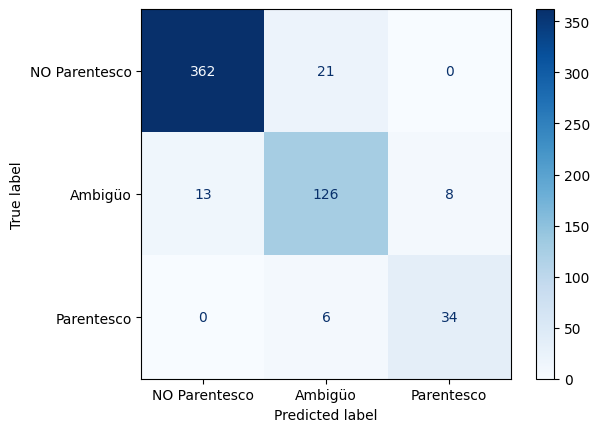

In [82]:
# Print the confusion matrix

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [83]:
# Print the metrics for the Logistic Regression model


print("===== Metrics for Logistic Regression Model =====")
print(classification_report(y_test, y_pred_lr, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for Logistic Regression Model =====
               precision    recall  f1-score   support

NO Parentesco       0.97      0.95      0.96       383
      Ambigüo       0.82      0.86      0.84       147
   Parentesco       0.81      0.85      0.83        40

     accuracy                           0.92       570
    macro avg       0.87      0.88      0.87       570
 weighted avg       0.92      0.92      0.92       570



---

## Regresión logística base con múltiples variables

Modelo de regresión logística entrenado con hiperparámetros por defecto basado en variables de entrenamiento: ***("Shared_Markers", "k0", "k1", "k2", "Share_allele", "ValueLog10 (LR)")***

In [84]:
# Base Logistic Regression model 

log_model = LogisticRegression(n_jobs=-1)

In [85]:
# Training and evaluation of the logistic regression model

log_model.fit(x_train, y_train)

/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [86]:
y_pred = log_model.predict(x_test)

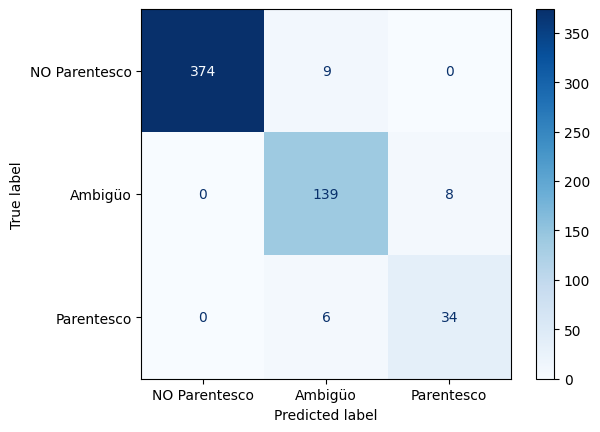

In [87]:
# Print the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [88]:
# Print the metrics for the Logistic Regression model

print("===== Metrics for Logistic Regression Model =====")
print(classification_report(y_test, y_pred, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for Logistic Regression Model =====
               precision    recall  f1-score   support

NO Parentesco       1.00      0.98      0.99       383
      Ambigüo       0.90      0.95      0.92       147
   Parentesco       0.81      0.85      0.83        40

     accuracy                           0.96       570
    macro avg       0.90      0.92      0.91       570
 weighted avg       0.96      0.96      0.96       570



---

## Regresión logística con múltiples variables aplicando Grid Search

Búsqueda de los mejores hiperparámetros usando Grid Search con variables múltiples.

In [89]:
# Base Logistic Regression model 

log_model = LogisticRegression(n_jobs=-1)

In [90]:
# Hyperparameter tuning with Grid Search

param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'max_iter': [100, 200, 300],
        'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'liblinear', 'sag', 'saga'],
        'C': np.logspace(-4, 4, 10),
        'n_jobs': [-1],
    }
]

In [91]:
# Traning a Logistic Regression model with Grid Search

model_grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
best_model = model_grid.fit(x_train, y_train)

/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

In [92]:
y_best_pred = best_model.predict(x_test)

In [93]:
# Print the best parameters found by Grid Search

print("Best parameters found by Grid Search:")
print(best_model.best_params_)
best_model.best_estimator_

Best parameters found by Grid Search:
{'C': np.float64(21.54434690031882), 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'lbfgs'}


,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(21.54434690031882)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


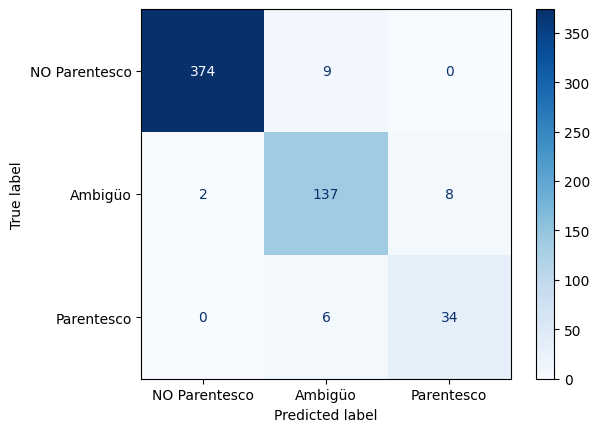

In [94]:
# Print the confusion matrix

conf_matrix = confusion_matrix(y_test, y_best_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [95]:
# Print the metrics for the Logistic Regression model

print("===== Metrics for Logistic Regression Model =====")
print(classification_report(y_test, y_pred, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for Logistic Regression Model =====
               precision    recall  f1-score   support

NO Parentesco       1.00      0.98      0.99       383
      Ambigüo       0.90      0.95      0.92       147
   Parentesco       0.81      0.85      0.83        40

     accuracy                           0.96       570
    macro avg       0.90      0.92      0.91       570
 weighted avg       0.96      0.96      0.96       570



---

## Regresión logística con múltiples variables y sus mejores parámetros obtenidos

Modelo de regresión logística aplicando los mejores parámetros obtenidos mediante Grid Search entrenado con las variables: K1, K2, y LR (ValueLog10)

In [96]:
feature_columns = ["k1", "k2", "ValueLog10"]

In [97]:
log_model = LogisticRegression(C=21.54434690031882, max_iter=100, penalty='l2', solver='lbfgs', n_jobs=-1)

In [98]:
x_train = df_train[feature_columns]
x_test = df_test[feature_columns]

In [99]:
# Train a Logistic Regression model

log_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,21.54434690031882
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
y_pred = log_model.predict(x_test)

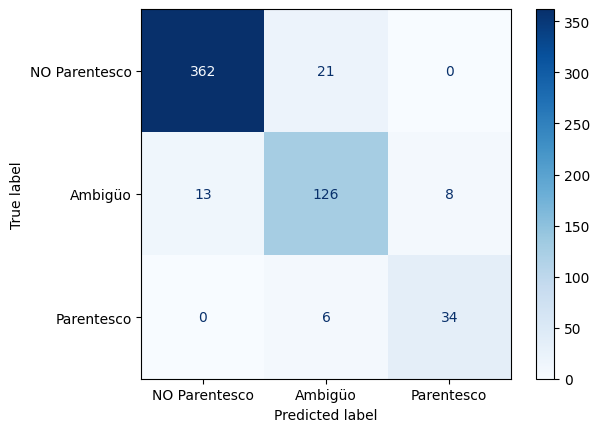

In [101]:
# Print the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [102]:
# Print the metrics for the Logistic Regression model

print("===== Metrics for Logistic Regression Model =====")
print(classification_report(y_test, y_pred, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for Logistic Regression Model =====
               precision    recall  f1-score   support

NO Parentesco       0.99      0.98      0.99       383
      Ambigüo       0.90      0.93      0.92       147
   Parentesco       0.81      0.85      0.83        40

     accuracy                           0.96       570
    macro avg       0.90      0.92      0.91       570
 weighted avg       0.96      0.96      0.96       570

